# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [4]:
base_url = 'http://api.openweathermap.org/data/2.5/weather?q='


temps = []
humids = []
clouds = []
lats = []
longs = []
winds = []
found_cities=[]
countries = []
for city in cities:
    try:
        query_url = base_url+city+'&units=metric&appid='+weather_api_key
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        temps.append(weather_json['main']['temp'])
        humids.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        winds.append(weather_json['wind']['speed'])
        lats.append(weather_json['coord']['lat'])
        longs.append(weather_json['coord']['lon'])
        found_cities.append(weather_json['name'])
        countries.append(weather_json["sys"]["country"])
        print(f'{cities.index(city)} {city} processed')
    
    except requests.HTTPError:
        print(f'{cities.index(city)} {city} API call limit, waiting 60 seconds')
        time.sleep(60)
    except KeyError:
        print(f'{cities.index(city)} {city} not found')


0 taolanaro not found
1 ponta do sol processed
2 richards bay processed
3 cape town processed
4 kendari processed
5 inzer processed
6 mataura processed
7 husavik processed
8 grand river south east not found
9 new norfolk processed
10 andenes processed
11 kodiak processed
12 rikitea processed
13 sept-iles processed
14 dunedin processed
15 nikolskoye processed
16 bredasdorp processed
17 manaure processed
18 tiksi processed
19 khatanga processed
20 karasburg processed
21 cidreira processed
22 bluff processed
23 freeport processed
24 calabozo processed
25 meulaboh processed
26 souillac processed
27 victoria processed
28 goderich processed
29 punta arenas processed
30 northam processed
31 talnakh processed
32 dongsheng processed
33 ushuaia processed
34 praia processed
35 ji-parana not found
36 kawardha processed
37 krasnoborsk processed
38 sao joao da barra processed
39 quang ngai processed
40 avarua processed
41 lompoc processed
42 barrow processed
43 akdepe processed
44 butaritari process

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df =pd.DataFrame({
    'City':found_cities,
    'Country':countries,
    'Latitude':lats,
    'Longitude':longs,
    'Temperature':temps,
    'Humidity %':humids,
    'Cloudiness':clouds,
    'Wind Speed':winds})

weather_df.to_csv('..\output_data\city_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df.drop(weather_df[weather_df['Humidity %'] > 100].index)
len(clean_city_data)

587

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

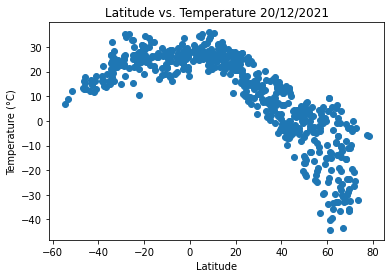

In [8]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Temperature'])
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Latitude vs. Temperature 20/12/2021')
plt.savefig('../output_data/Fig1')

Plots the latitude of a city against the temperature of the city

## Latitude vs. Humidity Plot

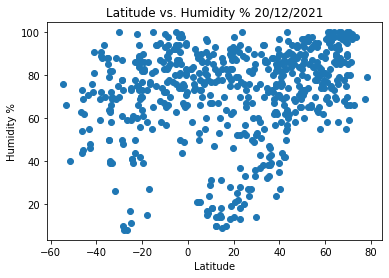

In [9]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity %'])
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Latitude vs. Humidity % 20/12/2021')
plt.savefig('../output_data/Fig2')

Plots the latitude of a city against the Humidity% of the city

## Latitude vs. Cloudiness Plot

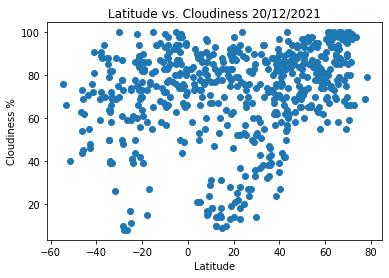

In [10]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Humidity %'])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.title('Latitude vs. Cloudiness 20/12/2021')
plt.savefig('../output_data/Fig3')

Plots the latitude of a city against the Cloudiness of the city

## Latitude vs. Wind Speed Plot

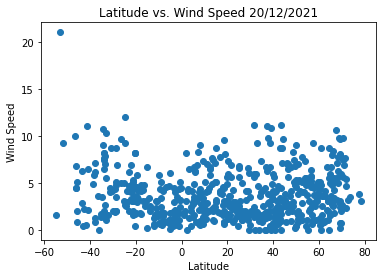

In [11]:
plt.scatter(clean_city_data['Latitude'],clean_city_data['Wind Speed'])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Latitude vs. Wind Speed 20/12/2021')
plt.savefig('../output_data/Fig4')

Plots the latitude of a city against the Wind Speed of the city

## Linear Regression

In [12]:
northern_cities = clean_city_data.loc[clean_city_data['Latitude']>=0]
southern_cities = clean_city_data.loc[clean_city_data['Latitude']<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

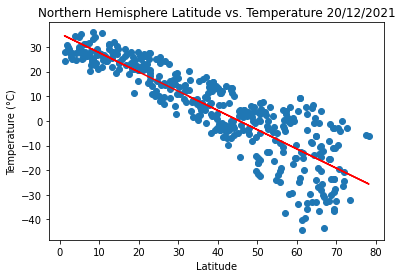

In [13]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Northern Hemisphere Latitude vs. Temperature 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

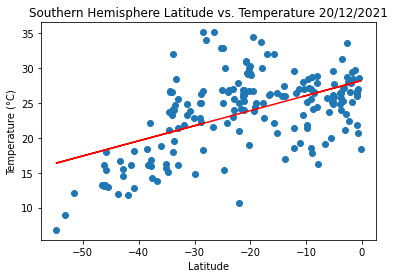

In [14]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Temperature']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Temperature (°C)')
plt.title('Southern Hemisphere Latitude vs. Temperature 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

From both graphs we can see a relationship between latitidue and temperature.
As Latitude approaches 0 (the equator) temperature trends up.
The strength of this relationship is greater in the Northern Hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

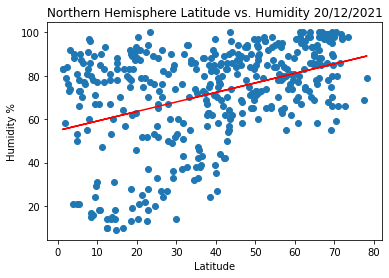

In [15]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Northern Hemisphere Latitude vs. Humidity 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

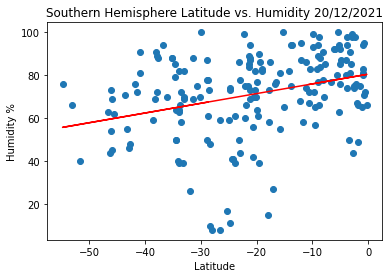

In [16]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Humidity %']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('Southern Hemisphere Latitude vs. Humidity 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

Both graphs show humudity % increasing as latitude increases.
In the Northern hemispehre this correlation seems weak, with many data points having high humidity at latitidues closer to 0.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

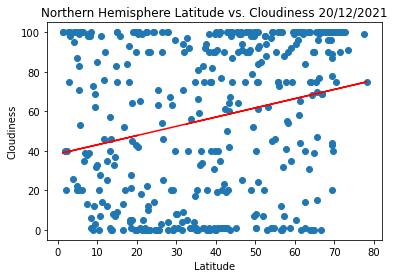

In [17]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere Latitude vs. Cloudiness 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

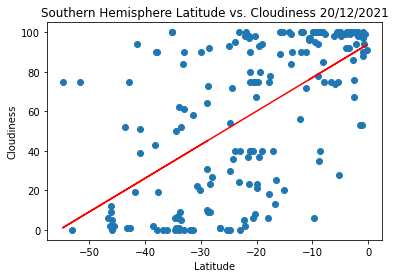

In [18]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Southern Hemisphere Latitude vs. Cloudiness 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

The lines of regression show a positive correlation between latitude and wind speed.
However when looking at the scatter plots this correlation appears very weak.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

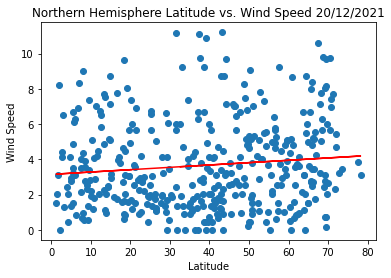

In [19]:
xaxis = northern_cities['Latitude']
yaxis = northern_cities['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Northern Hemisphere Latitude vs. Wind Speed 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<function matplotlib.pyplot.show(close=None, block=None)>

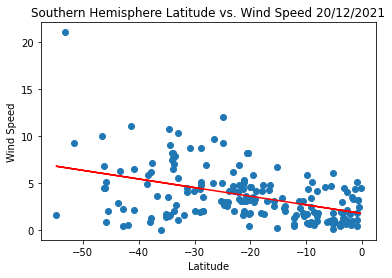

In [20]:
xaxis = southern_cities['Latitude']
yaxis = southern_cities['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(xaxis, yaxis)
regress_values = xaxis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.title('Southern Hemisphere Latitude vs. Wind Speed 20/12/2021')

plt.scatter(xaxis,yaxis)
plt.plot(xaxis,regress_values,"r-")
plt.show

Wind speed appears to decreaase as latitidue approaches 0.
This relationship appears stronger in the southern hemisphere.